# Document Classification
By Anjal Hussan

# Problem Statement: Document Classification
ComeToMyHead had gathered news articles from more than 2000 news sources in more than 1 year of activity. Create a model using this data set. The model should be able to predict the class of a new documents

_________________________________________________________________________________________________________________________________________________

## Document / Text Classification

The supervised machine learning problem encourages to try different algorithms and techniques to search for models to produce general hypotheses, which then make the most accurate predictions possible about future instances. The same principles apply to text (or document) classification where there are many models can be used to train a text classifier.


# Data
We are going to use a data set(AG) which has more than han 1 million news articles. News articles have been gathered from more than 2000  news sources by ComeToMyHead in more than 1 year of activity. ComeToMyHead is an academic news search engine which has been running since July, 2004. The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc), information retrieval (ranking, search, etc), xml, data compression, data streaming, and any other non-commercial activity.

The AG's news topic classification dataset is constructed by choosing 4 largest classes from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600.


The file classes.txt contains a list of classes corresponding to each label.

The files train.csv and test.csv contain all the training samples as comma-sparated values. There are 3 columns in them, corresponding to class index (1 to 4), title and description. The title and description are escaped using double quotes ("), and any internal double quote is escaped by 2 double quotes (""). New lines are escaped by a backslash followed with an "n" character, that is "\n".

Let's get started by importing required libraries. 

In [41]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


In [10]:
classes = pd.read_csv("https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/classes.txt", header=None)
classes.head()

,0
0,World
1,Sports
2,Business
3,Sci/Tech


Looks like we have 4 categories of data in our dataset. let's explore the dataset now

In [12]:
dataset = pd.read_csv("https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv", header=None)
dataset.columns =['Category', 'Title', 'Description']
dataset.head()

,Category,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
dataset.tail()

,0,1,2
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...
119999,2,Nets get Carter from Raptors,INDIANAPOLIS -- All-Star Vince Carter was trad...


In [5]:
dataset.shape

(120000, 3)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       120000 non-null  int64 
 1   1       120000 non-null  object
 2   2       120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [18]:
dataset['Category'].value_counts()

4    30000
3    30000
2    30000
1    30000
Name: Category, dtype: int64

,0
0,World
1,Sports
2,Business
3,Sci/Tech


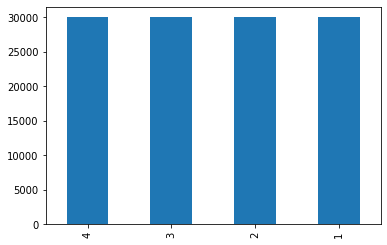

In [13]:
dataset.Category.value_counts().plot(kind='bar');

Looks like we have equal number of rows for each categories. that makes our dataset pretty balanced

Now that we have data in place - let's define our independent variable for training dataset and target variable for the training dataset

In [43]:
x_train = dataset['Description']
x_train.head()

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: Description, dtype: object

In [29]:
y_train = dataset['Category']
y_train.head()

0    3
1    3
2    3
3    3
4    3
Name: Category, dtype: int64

Let double check the size of the independent variable and the target variable for training dataset.

In [30]:
x_train.size

240000

In [31]:
y_train.size


120000

The dataset also comes with a seperate csv file which contains test dataset.

In [32]:
testdf = pd.read_csv("https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/test.csv", header=None)
testdf.columns =['Category', 'Title', 'Description']
x_test = testdf['Description']
y_test = testdf['Category']

x_test.head()

0    Unions representing workers at Turner   Newall...
1    SPACE.com - TORONTO, Canada -- A second\team o...
2    AP - A company founded by a chemistry research...
3    AP - It's barely dawn when Mike Fitzpatrick st...
4    AP - Southern California's smog-fighting agenc...
Name: Description, dtype: object

In [33]:
x_test.head()

0    Unions representing workers at Turner   Newall...
1    SPACE.com - TORONTO, Canada -- A second\team o...
2    AP - A company founded by a chemistry research...
3    AP - It's barely dawn when Mike Fitzpatrick st...
4    AP - Southern California's smog-fighting agenc...
Name: Description, dtype: object

In [34]:
x_test.size

7600

In [35]:
y_test.size

7600

In [36]:
categories=['World', 'Sports', 'Business', 'Sci/Tech']

# Naive Bayes Classifier for Multinomial Models
We can train a classifier to try to predict the category of a post. We will start with a Naive Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for text is the multinomial variant.

To make the vectorizer => transformer => classifier easier to work with, we will use Pipeline class in Scilkit-Learn that behaves like a compound classifier.

In [46]:
%%time

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(x_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.8935526315789474
              precision    recall  f1-score   support

       World       0.91      0.89      0.90      1900
      Sports       0.95      0.97      0.96      1900
    Business       0.86      0.84      0.85      1900
    Sci/Tech       0.86      0.87      0.87      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600

CPU times: user 3.4 s, sys: 111 ms, total: 3.51 s
Wall time: 3.52 s


We achieved 89% accuracy

# Linear Support Vector Machine
Linear Support Vector Machine is widely regarded as one of the best text classification algorithms.

In [47]:
%%time


sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(x_train, y_train)



y_pred = sgd.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.8644736842105263
              precision    recall  f1-score   support

       World       0.89      0.87      0.88      1900
      Sports       0.87      0.98      0.92      1900
    Business       0.85      0.80      0.82      1900
    Sci/Tech       0.85      0.82      0.83      1900

    accuracy                           0.86      7600
   macro avg       0.86      0.86      0.86      7600
weighted avg       0.86      0.86      0.86      7600

CPU times: user 6.59 s, sys: 783 ms, total: 7.37 s
Wall time: 4.22 s


We achieve a higher accuracy score of 86% which is 4% lower than Naive Bayes.



# Logistic Regression
Logistic regression is a simple and easy to understand classification algorithm, and Logistic regression can be easily generalized to multiple classes.

In [49]:
%%time


logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(x_train, y_train)



y_pred = logreg.predict(x_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.895921052631579
              precision    recall  f1-score   support

       World       0.90      0.89      0.90      1900
      Sports       0.95      0.96      0.96      1900
    Business       0.86      0.86      0.86      1900
    Sci/Tech       0.88      0.87      0.87      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600

CPU times: user 2min 5s, sys: 50.2 s, total: 2min 55s
Wall time: 16.1 s


We achieve an accuracy score of 89.5% which is slightly higher than Naive Bayes.

As you can see, following some very basic steps and using a simple linear model, we were able to reach as high as an 89.5% accuracy on the text classification data set.